# Modeling

# 1.1 Contents<a id='1.1_Contents'></a>
* [1 Modeling](#1_Modeling)
  * [1.1 Imports](#1.1_Imports)
  * [1.2 Load The Data](#1.2_Load_The_Data)
  * [1.3 Train Test Split](#1.3_Train_Test_Split)
  * [1.4 Metrics](#1.4_Metrics)
      * [1.4.1 R-Squared](#1.4.1_R-Squared)

## 1.1 Imports

In [40]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import pacf
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_forecast_component, plot_yearly

## 1.2 Load the Data

In [41]:
df = pd.read_excel(r'/Users/Alan/Library/CloudStorage/OneDrive-Comcast/Python/Springboard/Data Wrangling.xlsx')
df.head().T

,0,1,2,3,4
Traffic_Date,2014-12-22 00:00:00,2014-12-22 00:00:00,2014-12-22 00:00:00,2014-12-22 00:00:00,2014-12-22 00:00:00
STORE_NAME,"3351 - Albuquerque, NM (XF)","3352 - Lakewood, CO (XF)","3353 - Colorado Springs, CO (XF)","3354 - Thornton, CO (XF)","3356 - Boulder, CO (XF)"
STORE_CITY_NAME,Albuquerque,Lakewood,Colorado Springs,Thornton,Boulder
STORE_STATE_CODE,NM,CO,CO,CO,CO
Door_Swings,656,452,562,594,369


In [42]:
df.rename(columns={'STORE_NAME' : 'store_name', 'Traffic_Date' : 'ds', 'STORE_CITY_NAME' : 'city', 'STORE_STATE_CODE' : 'state','Door_Swings' : 'y'}, inplace=True)

## 1.3 Explore the Data

In [43]:
df.shape

(74789, 5)

In [44]:
df.head()

,ds,store_name,city,state,y
0,2014-12-22,"3351 - Albuquerque, NM (XF)",Albuquerque,NM,656
1,2014-12-22,"3352 - Lakewood, CO (XF)",Lakewood,CO,452
2,2014-12-22,"3353 - Colorado Springs, CO (XF)",Colorado Springs,CO,562
3,2014-12-22,"3354 - Thornton, CO (XF)",Thornton,CO,594
4,2014-12-22,"3356 - Boulder, CO (XF)",Boulder,CO,369


In [45]:
df.dtypes

ds            datetime64[ns]
store_name            object
city                  object
state                 object
y                      int64
dtype: object

## 1.4 Fit the Model

In [48]:
y_train = df[df.store_name == '3351 - Albuquerque, NM (XF)']

In [49]:
y_train = y_train[['ds', 'y']]

In [66]:
m = Prophet(interval_width = 0.95, yearly_seasonality=True)
m.add_country_holidays(country_name='US')
m.fit(y_train)

13:36:17 - cmdstanpy - INFO - Chain [1] start processing
13:36:18 - cmdstanpy - INFO - Chain [1] done processing


In [69]:
m.train_holiday_names.to_list()

["New Year's Day",
 'Martin Luther King Jr. Day',
 "Washington's Birthday",
 'Memorial Day',
 'Independence Day',
 'Labor Day',
 'Columbus Day',
 'Veterans Day',
 'Thanksgiving',
 'Christmas Day',
 'Christmas Day (Observed)',
 "New Year's Day (Observed)",
 'Veterans Day (Observed)',
 'Independence Day (Observed)',
 'Juneteenth National Independence Day',
 'Juneteenth National Independence Day (Observed)']

In [70]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3201,2023-11-16
3202,2023-11-17
3203,2023-11-18
3204,2023-11-19
3205,2023-11-20


In [71]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3201,2023-11-16,319.263702,100.171535,533.471141
3202,2023-11-17,451.650925,220.360802,676.406901
3203,2023-11-18,350.083809,131.457743,562.581237
3204,2023-11-19,-11.546996,-234.950133,197.752028
3205,2023-11-20,433.577554,219.559293,665.381531


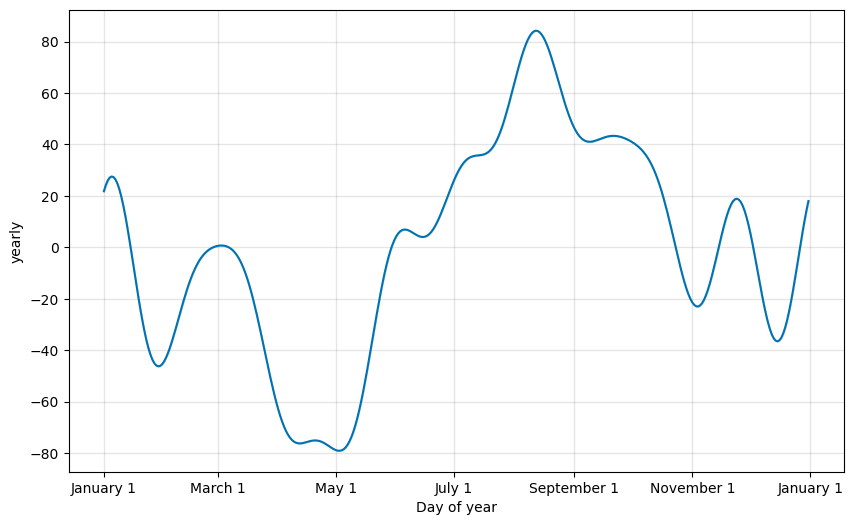

In [75]:
a = plot_yearly(m)

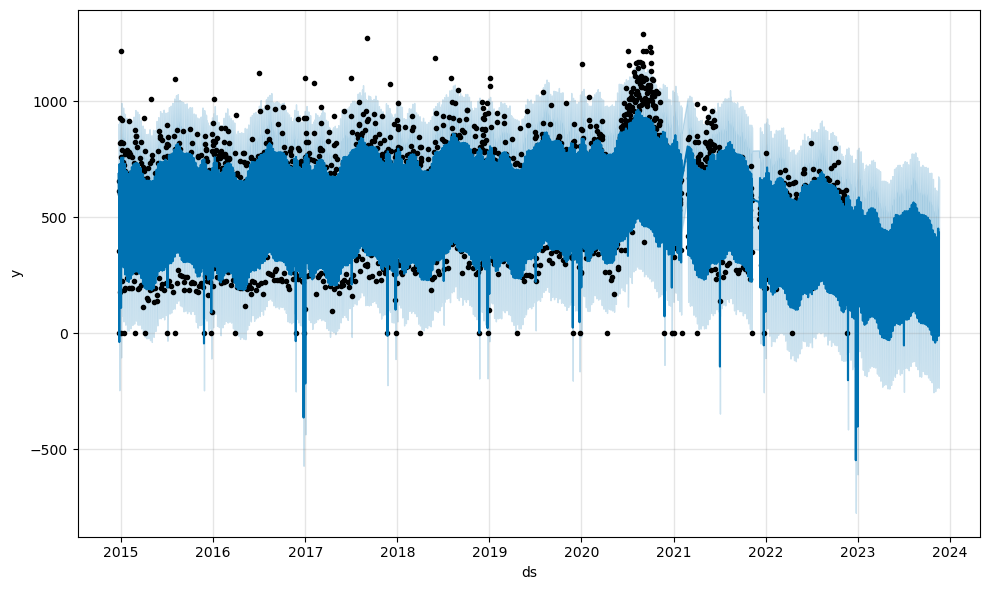

In [72]:
fig1 = m.plot(forecast)

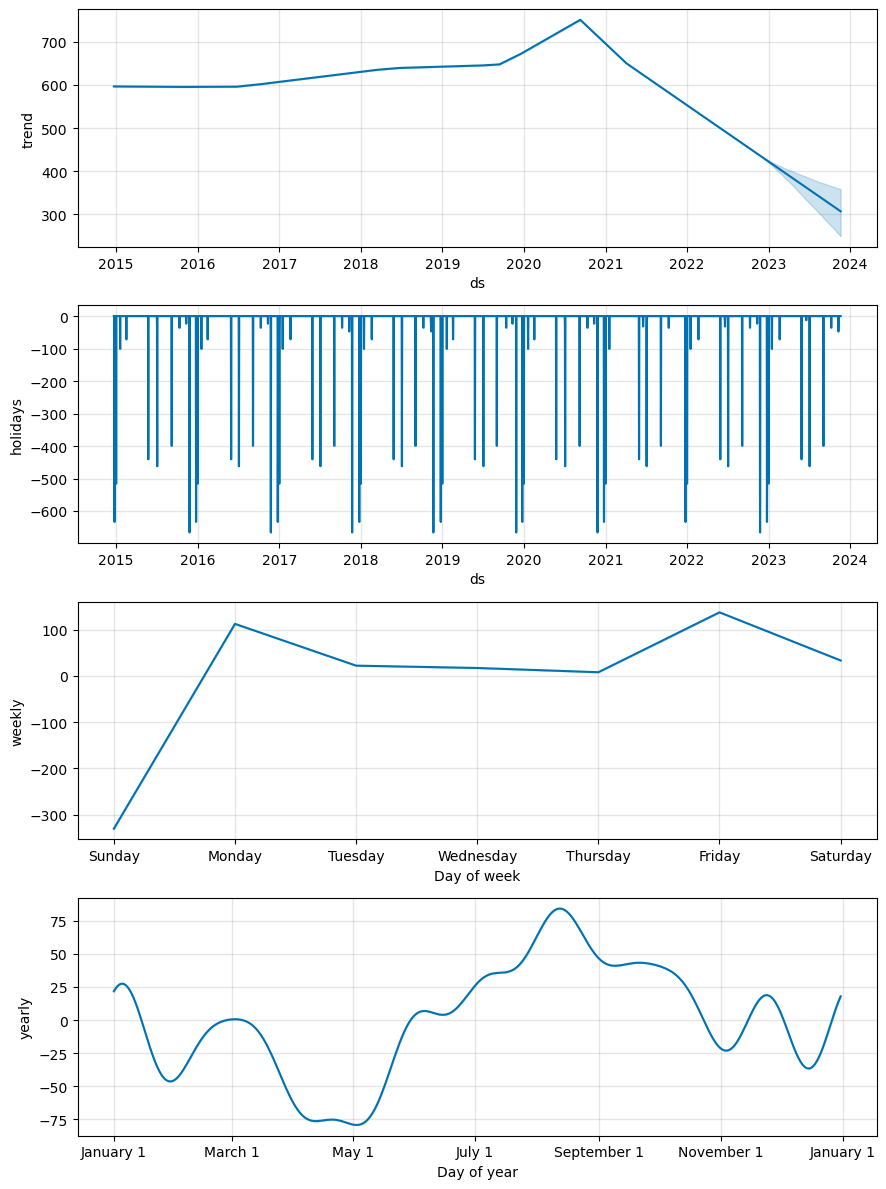

In [73]:
fig2 = m.plot_components(forecast)

In [74]:
plot_plotly(m, forecast)

14:01:58 - cmdstanpy - INFO - Chain [1] start processing
14:02:09 - cmdstanpy - INFO - Chain [1] done processing


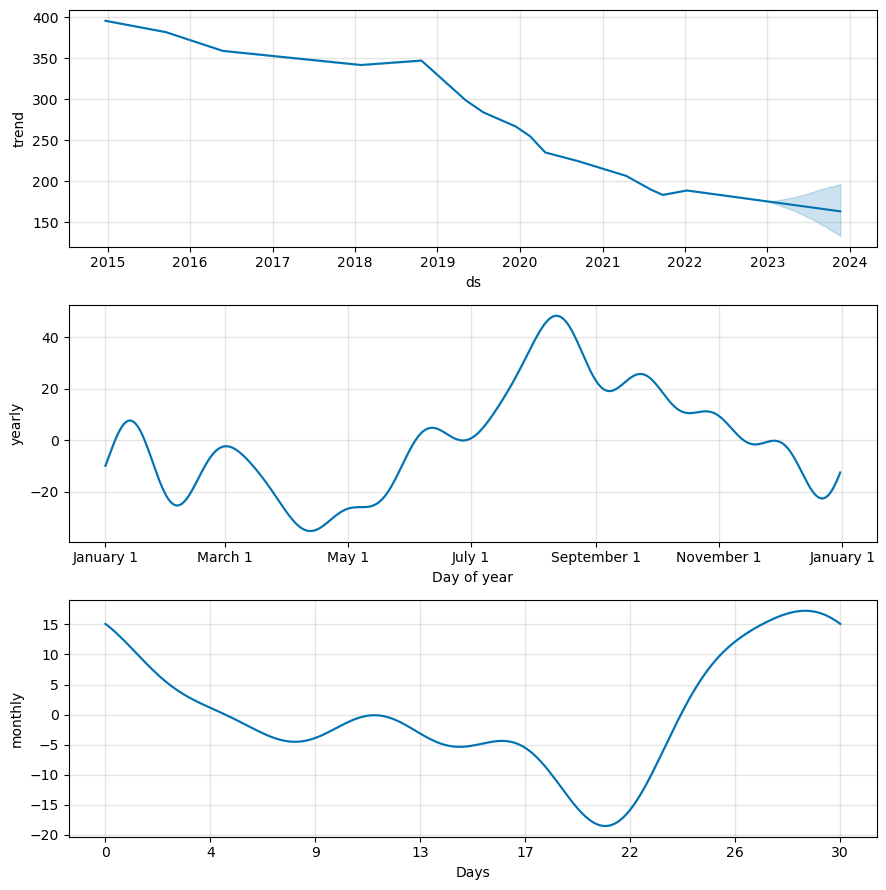

In [80]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name = 'monthly', period = 30.5, fourier_order = 5)
forecast = m.fit(df).predict(future)
fig3 = m.plot_components(forecast)